In [2]:
import gensim

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format("/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin", binary= True)

In [4]:
keys = ['Vietnam', 'Python', 'Hanbok', 'Food', 'Twitter', 'Bachelor', 'Beauty', 'Fashion', 'IT', 'Idol']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [5]:
word_clusters

[['Viet_Nam',
  'Vietnam_War',
  'Indochina',
  'Vietnamese',
  'Vietman',
  'Cambodia',
  'VietNam',
  'While_Megi_bypassed',
  'Hanoi',
  'Laos'],
 ['Jython',
  'Perl_Python',
  'IronPython',
  'scripting_languages',
  'PHP_Perl',
  'Java_Python',
  'PHP',
  'Python_Ruby',
  'Visual_Basic',
  'Perl'],
 ['hanbok',
  'durumagi',
  'Japanese_kimonos',
  'Ao_dai',
  'traditional_ao_dai',
  'Vo_Viet',
  'cheongsams',
  'Ao_Dai',
  'Lie_Sang_Bong',
  'Vietnamese_ao_dai'],
 ['food',
  'Drug_Adminstration_FDA',
  'Bashas_supermarkets',
  'Clothing_Pantry',
  'Drug_Administration_anidulafungin',
  'Recalled_Pet',
  'Drink_iNet',
  'Donna_Maurillo_Food',
  'FOOD',
  'officer_Lemma_Jembere'],
 ['twitter',
  'Twitter.com',
  'Facebook',
  'tweet',
  'tweets',
  'Tweet',
  'tweeting',
  'Tweets',
  'TwitterTwitter',
  'Tweeting'],
 ['Bachelors',
  'bachelor',
  'Bachelor_Degree',
  'bachelors_degree',
  'Bachelors_degree',
  'Bachelors_Degree',
  'bachelor_degree',
  'Master_Degree',
  'Associate

## a. nhận xét về ngữ nghĩa các từ có embedding gần nhau:

* 'Vietnam': words describe neighbor nations, capital, nationality, historical information
* 'Python': some other programming languagues, sources,...
* 'Hanbok': words describes other traditional costumes, Korea's fashion designer,
* 'Food':
* 'Twitter': written in other ways, functions belong to twitter, other social media
* 'Bachelor': written in other ways
* 'Beauty': beauty components
* 'Fashion': event, styles, special items 
* 'IT': IT-related service, job position
* 'Idol': famous competitions,...


In [29]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity= 10, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


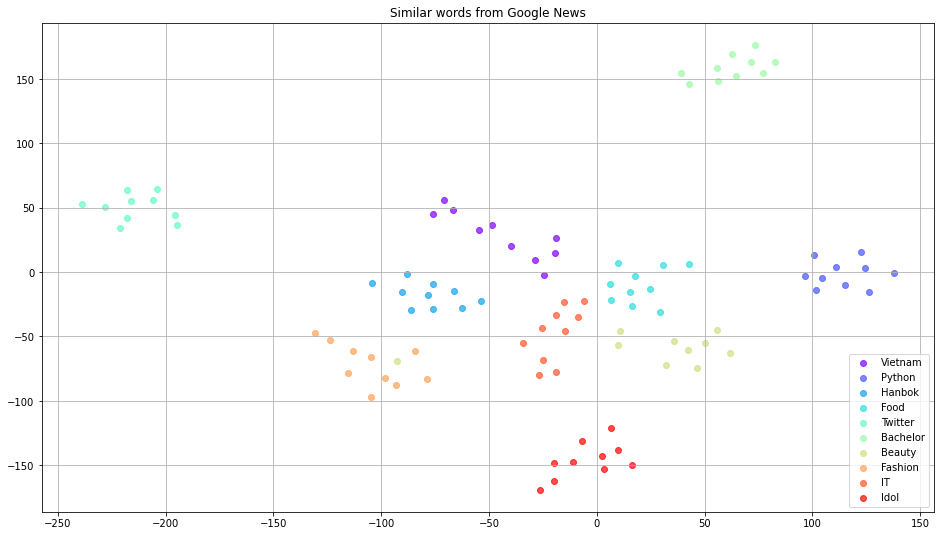

In [32]:
# % matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

#### Nhận xét các cụm

Hầu hết các điểm thuộc các cụm đều tập trung gần nhau. Tuy nhiên ở cụm "Beauty" có 1 điểm nằm cách xa, lẫn vào trong cụm "Fashion". Khoảng cách giữa các điểm thuộc cụm "Vietnam" có phần xa hơn. Một số cụm như "Vietnam", "Hanbok", "Food",... nằm gần nhau. Ngược lại, cụm "Bachelor", "Twitter" lại nằm xa các cụm còn lại